# Анализ пользовательского взаимодействия с карточками статей Яндекс.Дзен

### Описание проекта

Для автоматизации анализа пользовательского взаимодействия с карточками статей Яндекс.Дзен необходимо создать дашборд.<br>

Каждую карточку определяют её тема и источник (у него тоже есть тема). <br> 
Примеры тем: «Красота и здоровье», «Россия», «Путешествия».<br>
Пользователей системы характеризует возрастная категория. Скажем, «26-30» или «45+».<br><br>
Есть три способа взаимодействия пользователей с системой:<br>
* Карточка отображена для пользователя (`show`);
* Пользователь кликнул на карточку (`click`);
* Пользователь просмотрел статью карточки (`view`).

Дашборд будет основываться на пайплайне, который будет брать данные из таблицы, в которых хранятся сырые данные, трансформировать данные и укладывать их в агрегирующую таблицу. Пайплайн разработан дата-инженерами.

<b>Цель исследования</b> -  разработать дашборд, по которому менеджеры самостоятельно смогут проводить анализ пользовательского взаимодействия с карточками сетей Яндекс.Дзен. Что значительно сократит трудозатраты действующего аналитика на еженедельный анализ одних и тех же метрик.

<b>Задачи исследования</b> - автоматизировать еженедельный процесс анализа пользовательского взаимодействия с карточками статей Яндекс.Дзен при помощи построения дашборда.

<b>Ход исследования</b><br><br>
Выгрузить данныe из таблицы `dash_visits` в файл `dash_visits.csv`.<br>
В Tableau Public на основе файла `dash_visits.csv`  сформировать дашборд в соответствии с макетом;<br>
Подготовить отчет в формате презентации с ответами на следующие вопросы менеджеров:
* Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
* Как много карточек генерируют источники с разными темами?
* Как соотносятся темы карточек и темы источников?

<b>Краткое техническое задание (ТЗ) для создания дашборда</b> :
* Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;
* Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;
* Кто будет основным пользователем дашборда: менеджеры по анализу контента;<br><br>
* Состав данных для дашборда:<br><br>
    * История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
    * Разбивка событий по темам источников;
    * Таблица соответствия тем источников темам карточек;<br><br>
* По каким параметрам данные должны группироваться:<br><br>
    * Дата и время;
    * Тема карточки;
    * Тема источника;
    * Возрастная группа;<br><br>
* Характер данных:<br><br>
    * История событий по темам карточек — абсолютные величины с разбивкой по минутам;
    * Разбивка событий по темам источников — относительные величины (% событий);
    * Соответствия тем источников темам карточек - абсолютные величины;<br><br>
* Важность: все графики имеют равную важность;  <br><br>

* Источники данных для дашборда: <br>
дата-инженеры подготовили агрегирующую таблицу `dash_visits`. Вот её структура:<br><br>
    * `record_id`  — первичный ключ,
    * `item_topic` — тема карточки,
    * `source_topic` — тема источника,
    * `age_segment` — возрастной сегмент,  
    * `dt` — дата и время,
    * `visits` —  количество событий.<br><br>
    
* Таблица хранится в специально подготовленной базе данных `zen`;<br>
* Частота обновления данных: один раз в сутки, в полночь по UTC;

* Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):


<div>
<b>Макет дашборда</b><br><br>
    
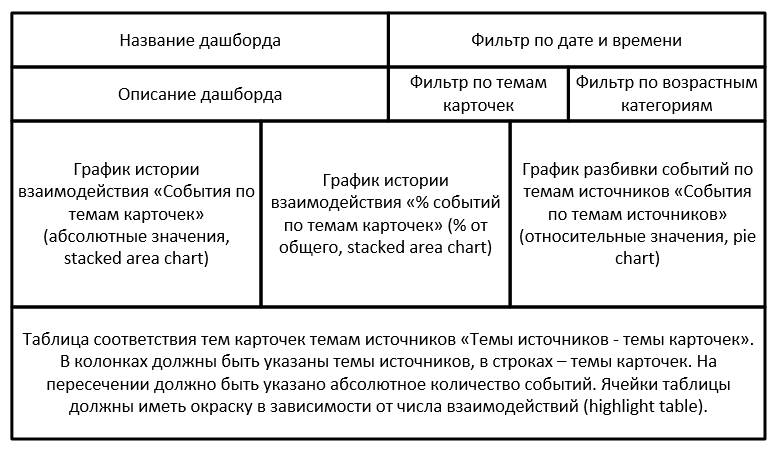
    

### Выгрузка файла для построения дашборда

Выгрузим данные из таблицы `dash_visits` в файл `dash_visits.csv`;<br>
Данный файл необходим для последующего использования при построении дашборда в Tableau Public.<br>
Создадим коннекцию к базе. Коннекция к базе хранится в переменной `engine`.


In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

In [2]:
#выполним sql-запрос 

query = ''' SELECT * 
                FROM dash_visits 
            '''
pd.io.sql.read_sql(query, con = engine).to_csv('dash_visits.csv', sep='\t', encoding='utf-8')

Ссылка на дашборд: https://public.tableau.com/app/profile/zarinakhabarova/viz/dash_visits_16745122141690/Dashboard?publish=yes
